In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.tree import plot_tree
#from graphviz import Source

#from sklearn.tree import convert_to_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

from sklearn import decomposition
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition   import PCA
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import confusion_matrix
from sklearn.kernel_approximation import RBFSampler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import pickle

In [3]:
data =pd.read_excel(r"/home/vildeg/Code/Heart disease UCI/dataset.xlsx")

In [4]:
y = data['Target']
X= data.drop(['Target'], axis = 1)
X_train, X_t, y_train, y_t = train_test_split(X, y, test_size = 0.4, random_state = 5)
X_val, X_test, y_val, y_test = train_test_split(X_t, y_t, test_size = 0.5, random_state = 15)

# kNN

Best number of clusters=  9 , with score=  0.864406779661017


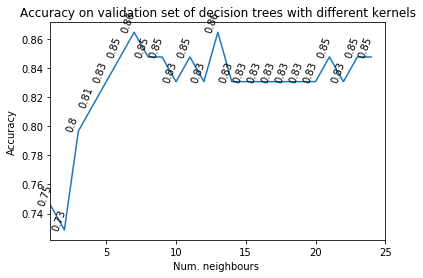

In [5]:
scores=[]
for k in range(1,25):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    scores.append((knn_classifier.score(X_val, y_val)))

num_clusters = list(range(1,25))
colors = rainbow(np.linspace(0, 1, int(len(num_clusters)/3)))

plt.plot(num_clusters,scores)
for i in range(0,len(num_clusters)):
    plt.text(i, scores[i], round(scores[i],2),rotation=70)
indx = np.argmax(scores)
plt.ylabel("Accuracy")
plt.xlabel("Num. neighbours ")
plt.xlim([1,25])
plt.title("Accuracy on validation set of decision trees with different kernels")
num_clusters_b = np.argmax(scores)+3
print("Best number of clusters= ",num_clusters_b, ", with score= ", scores[np.argmax(scores)])
plt.savefig(r"/home/vildeg/Code/Heart disease UCI/kNN.png")
    

In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors = num_clusters_b)
knn_classifier.fit(X_train, y_train)
score = knn_classifier.score(X_test, y_test)
print(score)

0.8333333333333334


# SVC

[1 2 3 4]
1 0.8983050847457628


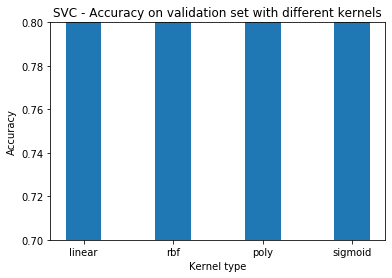

In [7]:
kernels = ['linear','rbf', 'poly','sigmoid']
scores_svc =[]
for k in range(len(kernels)):
    svc_classifier= SVC(kernel=kernels[k], gamma = 'auto')
    svc_classifier.fit(X_train,y_train)
    scores_svc.append(svc_classifier.score(X_val,y_val))
a = np.arange(len(scores_svc))
a+=1
print(a)
plt.bar(a,scores_svc,width=0.4)
plt.xticks(a,kernels)
plt.title("SVC - Accuracy on validation set with different kernels")
plt.ylim([0.7,0.8])
indx = np.argmax(scores_svc)
plt.ylabel("Accuracy")
plt.xlabel("Kernel type")
plt.savefig(r"/home/vildeg/Code/Heart disease UCI/svc_kernels.png")
print(indx,scores_svc[indx])

In [8]:
svc_classifier= SVC(kernel=kernels[indx], gamma = 'auto')
svc_classifier.fit(X_train,y_train)
print(svc_classifier.score(X_test,y_test))

0.8333333333333334


# Decision trees

In [9]:
max_depths = 15
dt_scores=[]
for i in range(1, max_depths):
    dt_classifier = DecisionTreeClassifier(max_features = 10, max_depth = i,random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_val, y_val))

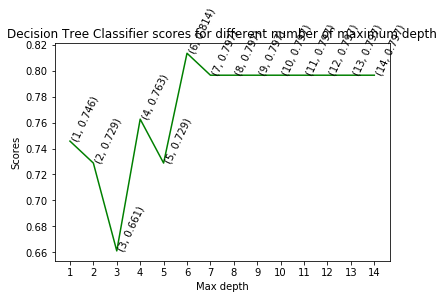

In [10]:
plt.plot([i for i in range(1, max_depths)], dt_scores, color = 'green')
for i in range(1, max_depths):
    plt.text(i, dt_scores[i-1], (i, round(dt_scores[i-1],3)), rotation=65)
plt.xticks([i for i in range(1, max_depths)])
plt.xlabel('Max depth')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum depth')
plt.savefig("DT_depth_results")
plt.savefig(r"/home/vildeg/Code/Heart disease UCI/DT_depths.png")

In [11]:
dt_classifier = DecisionTreeClassifier(max_features = 10, max_depth = 6,random_state = 0)
dt_classifier.fit(X_train, y_train)
print(dt_classifier.score(X_test, y_test))

0.8


# Random forests

In [12]:
rf_scores = []
estimators = [10,50,70, 100,150,170, 200,350, 500,700, 1000]
#estimators = [2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_val, y_val))

[10, 50, 70, 100, 150, 170, 200, 350, 500, 700, 1000]


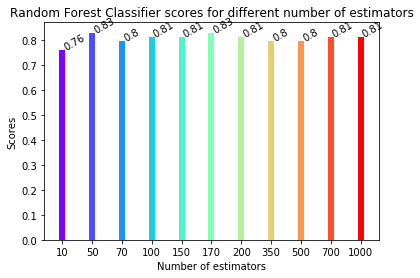

In [13]:
print(estimators)
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.2)
ticks = []
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], round(rf_scores[i],2), rotation=30)
    ticks.append(i)
plt.xticks(ticks, estimators)
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
plt.savefig(r"/home/vildeg/Code/Heart disease UCI/random_forests_num_trees.png")

In [14]:
rf_classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_classifier.fit(X_train, y_train)
score=rf_classifier.score(X_test, y_test)
print(10," estimators with score ",score)

10  estimators with score  0.85


In [15]:
activation = 'relu'
solver = 'lbfgs'
learning_rates= 'adaptive'
hls = (6,8)
max_score = 0
for i in range(0,100):
    mlp_classifier = MLPClassifier(solver=solver, activation = activation, learning_rate = learning_rates,hidden_layer_sizes=hls, max_iter=20000, early_stopping = True)
    mlp_classifier.fit(X_train, y_train)
    score = mlp_classifier.score( X_val, y_val)
    if score > max_score:
        max_score = score
        best_model = mlp_classifier
        
print(max_score)

0.8983050847457628


In [16]:
print(best_model.score(X_test,y_test))

0.8166666666666667
